### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = sns.load_dataset('mpg')

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.drop(['name'], axis = 1, inplace = True)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


### Summary of the dataset

In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Data Preprocessing

In [14]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [16]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [17]:
df.dropna(inplace = True)

In [19]:
df.isnull().sum().any()

False

### Univariance Analysis

In [22]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [26]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

<Axes: xlabel='cylinders', ylabel='count'>

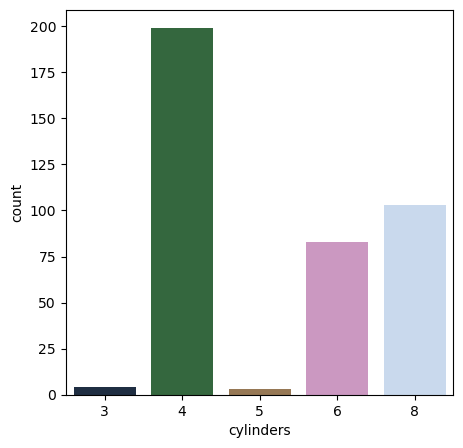

In [39]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['cylinders'],data = df,  palette = 'cubehelix')

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [41]:
df['model_year'] = (1900 + df.model_year)

In [42]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


<Axes: xlabel='count', ylabel='model_year'>

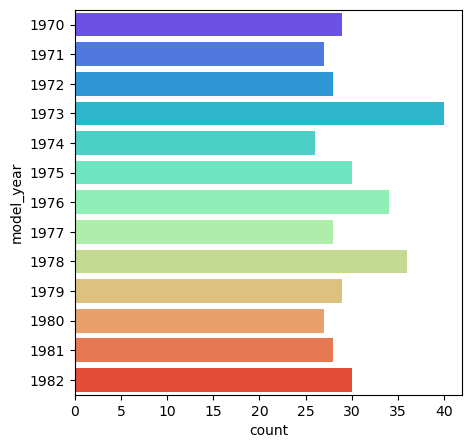

In [43]:
plt.figure(figsize = (5,5))
sns.countplot(y = df['model_year'], data = df, palette = 'rainbow')

<Axes: xlabel='origin', ylabel='count'>

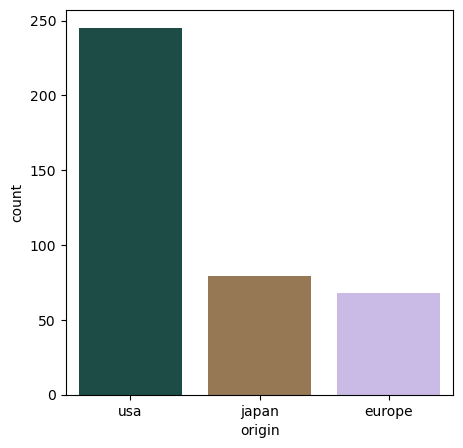

In [45]:
plt.figure(figsize = (5,5))
sns.countplot(x= df['origin'], data = df, palette = 'cubehelix')

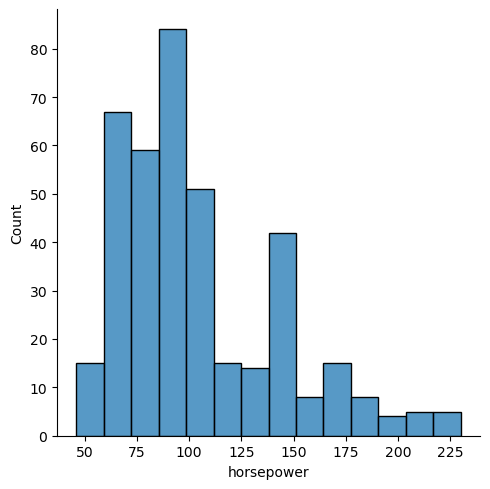

In [46]:
sns.displot(df['horsepower'])
plt.show()

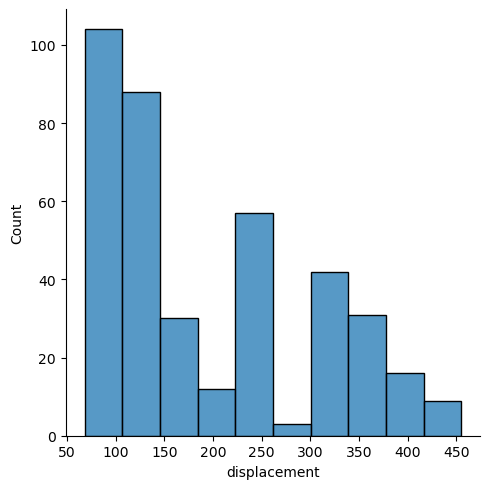

In [47]:
sns.displot(df['displacement'])
plt.show()

### Bivariance Analysis

<Axes: xlabel='cylinders', ylabel='mpg'>

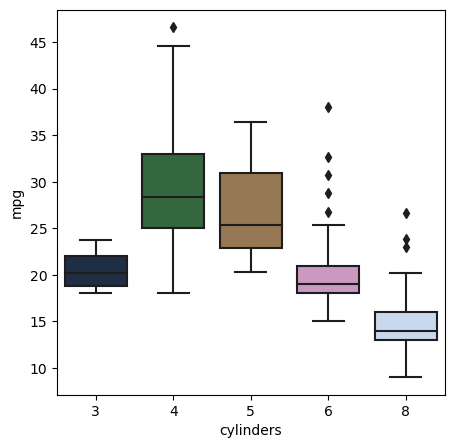

In [49]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'cylinders', y = 'mpg', data = df, palette = 'cubehelix')

<Axes: xlabel='model_year', ylabel='mpg'>

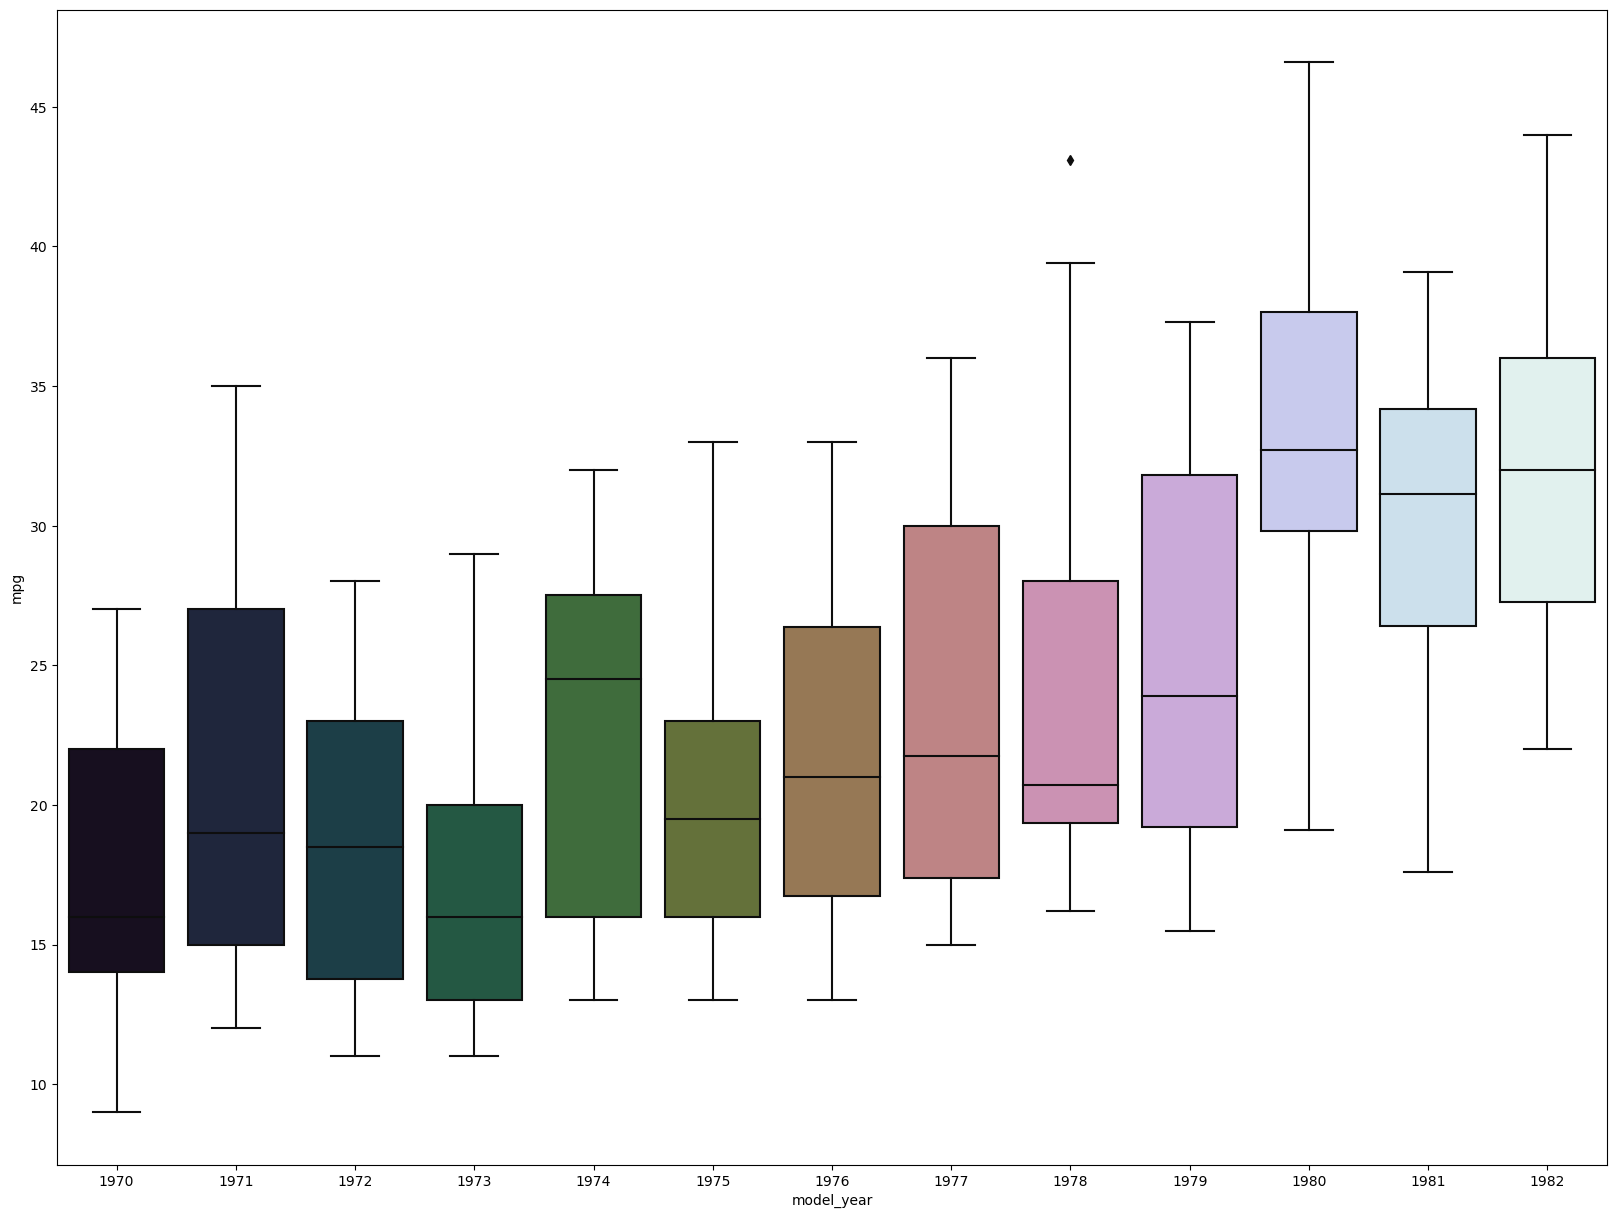

In [56]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'model_year', y = 'mpg', data = df, palette = 'cubehelix')

### Multivariance Analysis

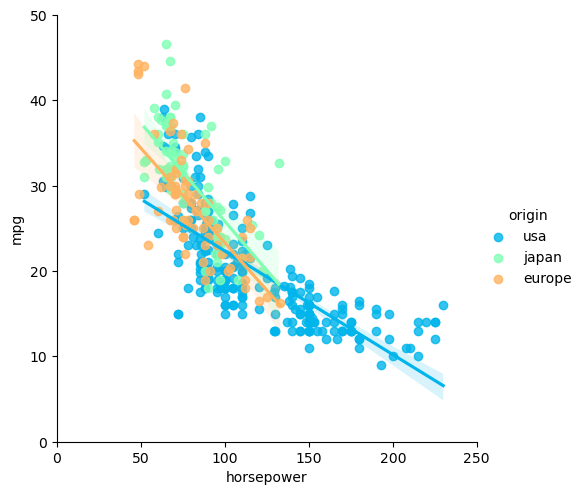

In [61]:
graph = sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(xlim =(0, 250))
graph.set(ylim = (0,50))

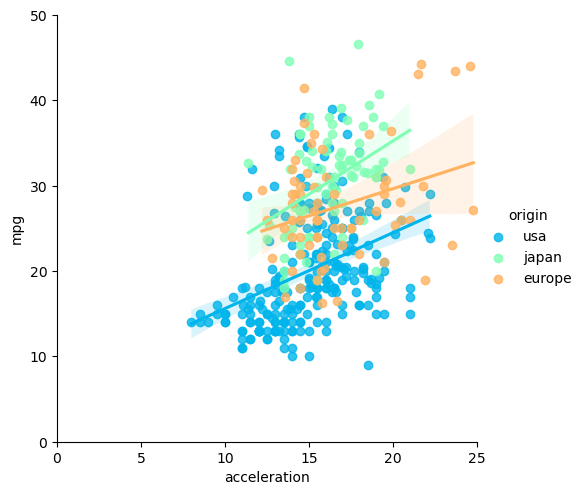

In [68]:
graph = sns.lmplot(x = 'acceleration', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(xlim = (0,25))
graph.set(ylim = (0,50))



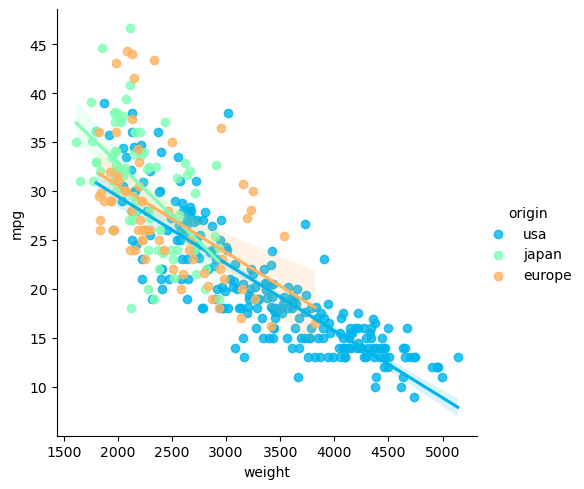

In [69]:
graph = sns.lmplot(x = 'weight', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')



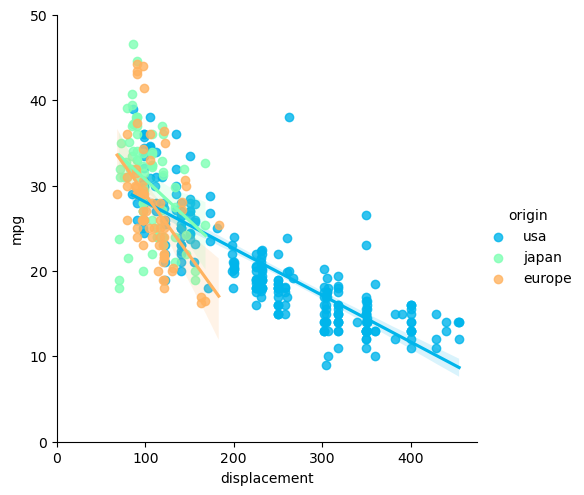

In [71]:
graph = sns.lmplot(x = 'displacement', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(ylim = (0, 50))
graph.set(xlim = (0, 475))
